In [1]:
import pandas as pd
import requests
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
urls = [
    "https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_1.txt",
    "https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_2.txt",
    "https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_3.txt",
    "https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_4.txt"
]

combined_text = ""

for url in urls:
    response = requests.get(url)
    if response.status_code == 200:
        combined_text += response.text + "\n"
    else:
        print(f"Не удалось загрузить текст из {url}: статус {response.status_code}")

print(combined_text[:500])

Annotation


Лев Толстой

Война и Мир

Том 1





* * *



Том IЧАСТЬ ПЕРВАЯI

II

III

IV

V

VI

VII

VIII

IX

X

XI

XII

XIII

XIV

XV

XVI

XVII

XVIII

XIX

XX

XXI

XXII

XXIII

XXIV

XXV

XXVI

XXVII

XXVIII





ЧАСТЬ BTОРАЯI

II

III

IV

V

VI

VII

VIII

IX

X

XI

XII

XIII

XIV

XV

XVI

XVII

XVIII

XIX

XX

XXI





ЧАСТЬ ТРЕТЬЯI

II

III

IV

V

V


In [3]:
print(combined_text[-500:])

, – так и в истории новое воззрение говорит: «И правда, мы не чувствуем нашей зависимости, но, допустив нашу свободу, мы приходим к бессмыслице; допустив же свою зависимость от внешнего мира, времени и причин, приходим к законам».

В первом случае надо было отказаться от сознания несуществующей неподвижности в пространстве и признать неощущаемое нами движение; в настоящем случае – точно так же необходимо отказаться от несуществующей свободы и признать неощущаемую нами зависимость.









In [4]:
text = combined_text.lower()
text = re.sub('[^а-яА-Я ]', '', text)
print(list(set(text)))

['и', 'у', 'м', 'я', 'й', 'з', 'ж', 'ъ', 'д', 'т', 'ы', 'б', 'ь', 'г', ' ', 'ф', 'л', 'ч', 'р', 'а', 'н', 'ц', 'щ', 'х', 'ю', 'е', 'п', 'в', 'с', 'ш', 'к', 'э', 'о']


In [5]:
RUS = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUS)}

In [6]:
probabilities = np.zeros((len(RUS), len(RUS)))

In [7]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [8]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

C:\Users\dogot\AppData\Local\Temp\ipykernel_1128\2743358628.py:1: RuntimeWarning: invalid value encountered in divide
  probabilities = (probabilities / probabilities.sum(axis=1)[:, None])


In [9]:
df = pd.DataFrame(probabilities, index=(c for c in RUS), columns=(c for c in RUS))

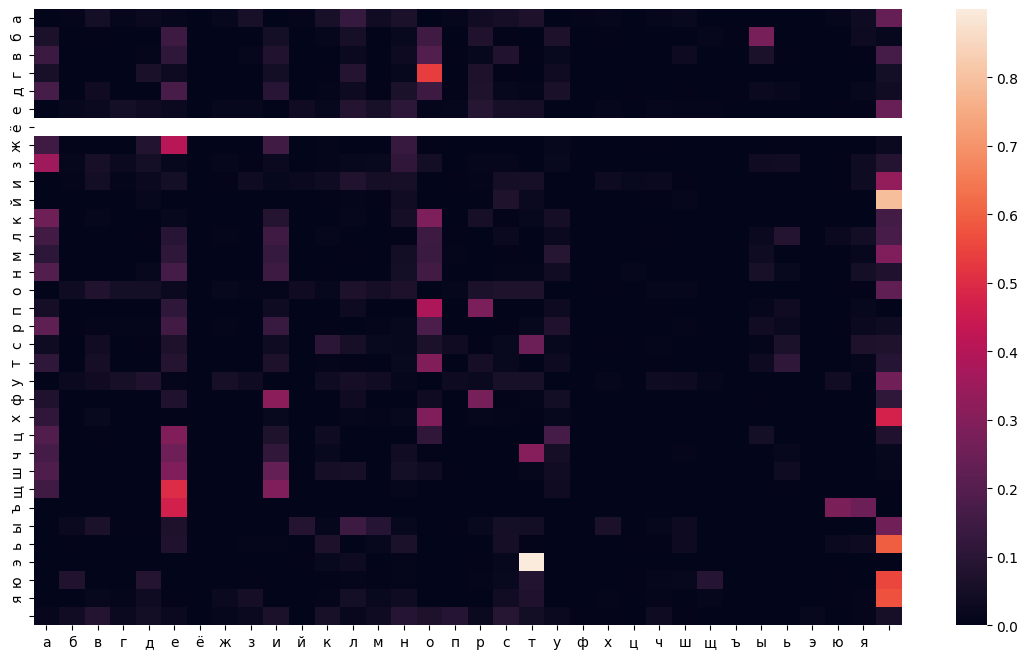

In [10]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [11]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUS)
for c1 in RUS:
    for c2 in RUS:
        proba = (
            prior *
            probabilities[start, POS[c1]] *
            probabilities[POS[c1], POS[c2]] *
            probabilities[POS[c2], end]
        )
        if proba > 0:
            print(''.join(['п', c1, c2, 'р']), proba)


паар 1.2483021244621608e-08
пабр 1.0155553856672825e-06
павр 1.15917977686471e-06
пагр 1.2848114697473956e-06
падр 2.942105165838902e-06
паер 1.9503146628298786e-06
пажр 7.311949848239609e-09
пазр 1.2095790878783555e-06
паир 2.547790864803073e-08
пайр 2.7599678947720997e-08
пакр 4.840852058790128e-06
палр 3.3611556905914123e-09
памр 1.0930948458598652e-07
панр 1.161326477180596e-07
паор 4.339681014540716e-08
папр 5.626388035700382e-06
парр 2.870279020272537e-08
паср 5.043304580053417e-07
патр 5.531903526415092e-06
паур 6.923602698965342e-08
пафр 3.17685218286211e-06
пахр 2.440818119506081e-07
пачр 2.6506060145138035e-08
пашр 5.266004634220631e-09
пащр 4.5451641687422465e-09
паэр 3.402682747656317e-10
паюр 1.6147067665876867e-07
паяр 1.4938299828069804e-07
па р 8.697598650738777e-06
пвар 2.806393138584855e-09
пвбр 1.5943951085774744e-11
пввр 8.160012706997085e-12
пвгр 3.321084346893555e-11
пвдр 2.685575343020761e-10
пвер 5.0598785244545456e-09
пвжр 3.909391636356634e-15
пвзр 8.485947199

In [12]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUS), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бо дрол ч


In [13]:
from hmmlearn.hmm import GaussianHMM

In [14]:
series = pd.read_csv("D:/Documents/python_projects/Netology/venv/times_series/1_introductions_with_times_series/1._Лекция_tsml/Series/international-airline-passengers.csv")["Count"]

In [15]:
values = series.values.reshape(-1,1)

In [16]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

d:\Documents\python_projects\Netology\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Documents\python_projects\Netology\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


1 -893.1837902090575
2 -893.1874702467611
3 -803.8291509542987
4 -771.1620522158012
5 -742.5336993077475
6 -717.9680489334055
7 -742.1890688672421
8 -711.8897134729802
9 -693.792701893369
10 -677.1223148923101


Fitting a model with 167 free scalar parameters with only 144 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 144 data points will result in a degenerate solution.


11 -697.9312272796915
12 -690.293243795334
13 -674.807246050444


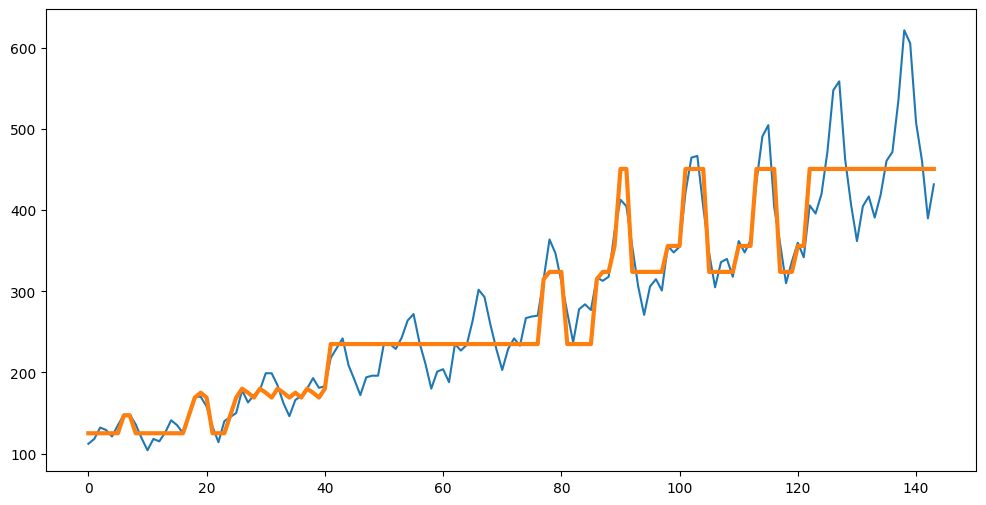

In [17]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [18]:
model.transmat_.shape

(10, 10)